# **Classiffication With Python**
We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Data Sheet
Lets Download Data Sheet

In [119]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-03 10:20:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-01-03 10:20:13 (15.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File

In [120]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [121]:
df.shape

(346, 10)

In [122]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [123]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [124]:
df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [125]:
df.shape

(346, 10)

## Data visualization and pre-processing
Let’s see how many of each class is in our data set

In [126]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Lets plot some columns to underestand data better:

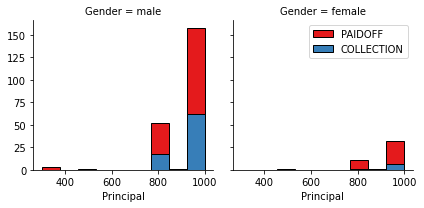

In [127]:
import seaborn as sns
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

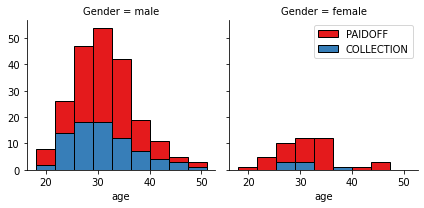

In [128]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction

In [129]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [130]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [131]:
x = df[['Unnamed: 0', 'Principal', 'terms', 'age', 'education', 'Gender']].values
x[0:5]

array([[0, 1000, 30, 45, 'High School or Below', 'male'],
       [2, 1000, 30, 33, 'Bechalor', 'female'],
       [3, 1000, 15, 27, 'college', 'male'],
       [4, 1000, 30, 28, 'college', 'female'],
       [6, 1000, 30, 29, 'college', 'male']], dtype=object)

In [132]:
from sklearn.preprocessing import LabelEncoder

edu = LabelEncoder()
edu.fit(['High School or Below', 'college', 'Bechalor', 'Master or Above'])
x[:,4] = edu.transform(x[:,4])

gen = LabelEncoder()
gen.fit(['male', 'female'])
x[:,5] = gen.transform(x[:,5])
x[0:5]

array([[0, 1000, 30, 45, 1, 1],
       [2, 1000, 30, 33, 0, 0],
       [3, 1000, 15, 27, 3, 1],
       [4, 1000, 30, 28, 3, 0],
       [6, 1000, 30, 29, 3, 1]], dtype=object)

In [133]:
x = x.astype('int')
x[0:5]

array([[   0, 1000,   30,   45,    1,    1],
       [   2, 1000,   30,   33,    0,    0],
       [   3, 1000,   15,   27,    3,    1],
       [   4, 1000,   30,   28,    3,    0],
       [   6, 1000,   30,   29,    3,    1]])

In [134]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [135]:
loan = LabelEncoder()
loan.fit(['PAIDOFF', 'COLLECTION'])
df['loan_status'] = loan.transform(df['loan_status'])

In [136]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [137]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
x = scl.fit_transform(x)
x[0:5]

array([[-1.75351563,  0.51578458,  0.92071769,  2.33152555, -0.64691859,
         0.42056004],
       [-1.73616849,  0.51578458,  0.92071769,  0.34170148, -1.5212695 ,
        -2.37778177],
       [-1.72749491,  0.51578458, -0.95911111, -0.65321055,  1.10178323,
         0.42056004],
       [-1.71882134,  0.51578458,  0.92071769, -0.48739188,  1.10178323,
        -2.37778177],
       [-1.7014742 ,  0.51578458,  0.92071769, -0.3215732 ,  1.10178323,
         0.42056004]])

## Training/ Testing split

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 6)
(104, 6)
(242,)
(104,)


## Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:
<ul>
<li>K Nearest Neighbor(KNN)</li>
<li>Decision Tree</li>
<li>Support Vector Machine</li>
<li>Logistic Regression</li>
</ul>





###  K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.
**warning**: You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.

The highest the jaccard score - the better the performance
The highest accuracy ( 0.925 ) we got at k=  4


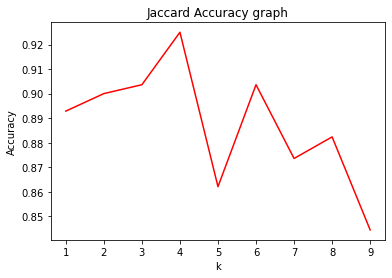

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import log_loss
j=[]
f=[]
l=[]
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pre = knn.predict(x_test)
    j.append(jaccard_score(y_pre, y_test))
    #cm = confusion_matrix(y_test, y_pre, labels=[1,0])
    #cr = classification_report(y_test, y_pre)
    f.append(f1_score(y_pre, y_test))
    l.append(log_loss(y_pre, y_test))
xx = np.arange(1,10,1)
plt.plot(xx, j, 'r')
plt.title('Jaccard Accuracy graph')
plt.xlabel('k')
plt.ylabel('Accuracy')
print("The highest the jaccard score - the better the performance")
print("The highest accuracy (",max(j),") we got at k= ", (j.index(max(j)))+1)

The Highest the f1 score - the better the performance
The Highest accuracy ( 0.961 ) we got at k=  4


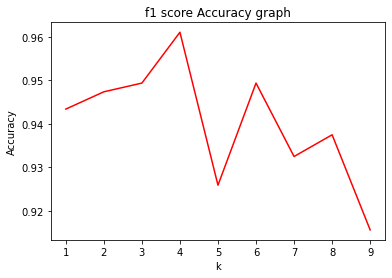

In [141]:
plt.plot(xx, f, 'r')
plt.title('f1 score Accuracy graph')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show

print("The Highest the f1 score - the better the performance")
print("The Highest accuracy (",'%.3f'%max(f),") we got at k= ", (f.index(max(f)))+1)

The Lowest the LogLoss score - the better the performance
The Lowest accuracy ( 1.993 ) we got at k=  4


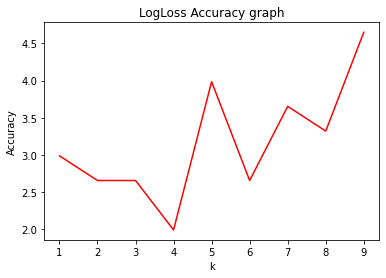

In [142]:
plt.plot(xx, l, 'r')
plt.title('LogLoss Accuracy graph')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show

print("The Lowest the LogLoss score - the better the performance")
print("The Lowest accuracy (",'%.3f'%min(l),") we got at k= ", (l.index(min(l)))+1)

##  Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
loan_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [144]:
yTre_pre = loan_tree.predict(x_test)
yTre_pre[0:5]

array([1, 1, 0, 0, 1])

In [145]:
j_tree = jaccard_score(yTre_pre, y_test)
print("The jaccard similarity score of this model is: ", j_tree)

The jaccard similarity score of this model is:  0.987012987012987


In [146]:
cm_tree = confusion_matrix(yTre_pre, y_test, labels=[1,0])
cr_tree = classification_report(yTre_pre, y_test)
print(cm_tree)
print(cr_tree)
f1_tree = f1_score(yTre_pre, y_test)
print("The f1 score of this model is: ", f1_tree)

[[76  0]
 [ 1 27]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.99      1.00      0.99        76

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104

The f1 score of this model is:  0.9934640522875817


In [147]:
l_tree = log_loss(yTre_pre, y_test)
print("The logloss score of this model is: ", l_tree)

The logloss score of this model is:  0.33211130761866325


In [148]:
from sklearn.metrics import accuracy_score
print("Decision's Accuracy: ",accuracy_score(yTre_pre, y_test))

Decision's Accuracy:  0.9903846153846154


## Support Vector Machine (SVM)

In [149]:
from sklearn import svm
loan_svm = svm.SVC(kernel='rbf')
loan_svm.fit(x_train, y_train)

SVC()

In [150]:
yS_pre = loan_svm.predict(x_test)
yS_pre[0:5]

array([1, 1, 0, 0, 1])

In [151]:
j_svm = jaccard_score(yS_pre, y_test)
print("The jaccard similarity score of this model is: ", j_svm)

The jaccard similarity score of this model is:  0.9746835443037974


In [152]:
cm_svm = confusion_matrix(yS_pre, y_test, labels=[1,0])
cr_svm = classification_report(yS_pre, y_test)
print(cm_svm)
print(cr_svm)
f1_svm = f1_score(yS_pre, y_test)
print("The f1 score of this model is: ", f1_svm)

[[77  2]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.97      0.99        79

    accuracy                           0.98       104
   macro avg       0.96      0.99      0.97       104
weighted avg       0.98      0.98      0.98       104

The f1 score of this model is:  0.9871794871794872


In [153]:
l_svm = log_loss(yS_pre, y_test)
print("The logloss score of this model is: ", l_svm)

The logloss score of this model is:  0.6642072383636681


In [154]:
from sklearn.metrics import accuracy_score
print("SVM's Accuracy: ",accuracy_score(yS_pre, y_test))

SVM's Accuracy:  0.9807692307692307


## Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
loan_log = LogisticRegression(C=0.01, solver='liblinear')
loan_log.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [157]:
yL_pre = loan_log.predict(x_test)
yL_pre[0:5]

array([1, 1, 0, 0, 1])

In [158]:
j_log = jaccard_score(yL_pre, y_test)
print("The jaccard similarity score of this model is: ", j_log)

The jaccard similarity score of this model is:  0.961038961038961


In [159]:
cm_log = confusion_matrix(yL_pre, y_test, labels=[1,0])
cr_log = classification_report(yL_pre, y_test)
print(cm_log)
print(cr_log)
f1_log = f1_score(yL_pre, y_test)
print("The f1 score of this model is: ", f1_log)

[[74  0]
 [ 3 27]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       0.96      1.00      0.98        74

    accuracy                           0.97       104
   macro avg       0.98      0.95      0.96       104
weighted avg       0.97      0.97      0.97       104

The f1 score of this model is:  0.9801324503311257


In [160]:
l_log = log_loss(yL_pre, y_test)
print("The logloss score of this model is: ", l_log)

The logloss score of this model is:  0.9963339228559878


In [161]:
from sklearn.metrics import accuracy_score
print("Logistic Regression's Accuracy: ",accuracy_score(yL_pre, y_test))

Logistic Regression's Accuracy:  0.9711538461538461


In [163]:
data = [[max(j), max(f), min(l)], [j_tree, f1_tree, l_tree], [j_svm, f1_svm, l_svm], [j_log, f1_log, l_log]]
table = pd.DataFrame(data, columns=['Jaccard score', 'f1 score', 'Logloss score'], index = ['KNN', 'Decision Tree','SVM', 'Logistic Regression'])
table

,Jaccard score,f1 score,Logloss score
KNN,0.925000,0.961039,1.992645
Decision Tree,0.987013,0.993464,0.332111
SVM,0.974684,0.987179,0.664207
Logistic Regression,0.961039,0.980132,0.996334


**Decision Tree** is The best classification algorithm sutaible for this dataset to predict whether a loan case will be **paid** off or **not**